In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("/content/Downloads")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
# from sklearn.ensemble import DecisionTreeClassifier
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   cp        1025 non-null   int64  
 2   trestbps  1025 non-null   int64  
 3   chol      1025 non-null   int64  
 4   fbs       1025 non-null   int64  
 5   restecg   1025 non-null   int64  
 6   thalach   1025 non-null   int64  
 7   exang     1025 non-null   int64  
 8   oldpeak   1025 non-null   float64
 9   slope     1025 non-null   int64  
 10  ca        1025 non-null   int64  
 11  thal      1025 non-null   int64  
 12  target    1025 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 104.2 KB


In [ ]:
data.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.isnull().sum()

age         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

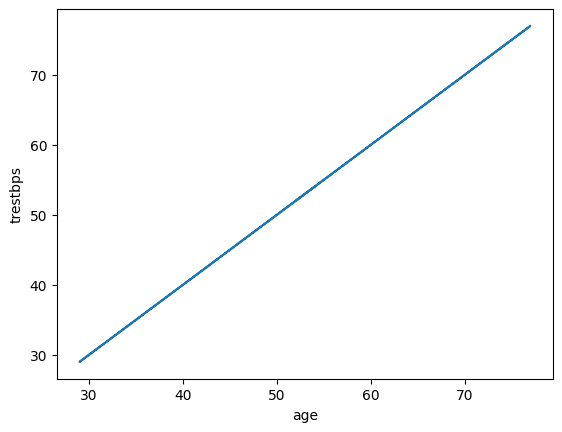

In [ ]:
plt.plot(data['age'],data['age'])
plt.xlabel('age')
plt.ylabel('trestbps')
plt.show()
plt.show()

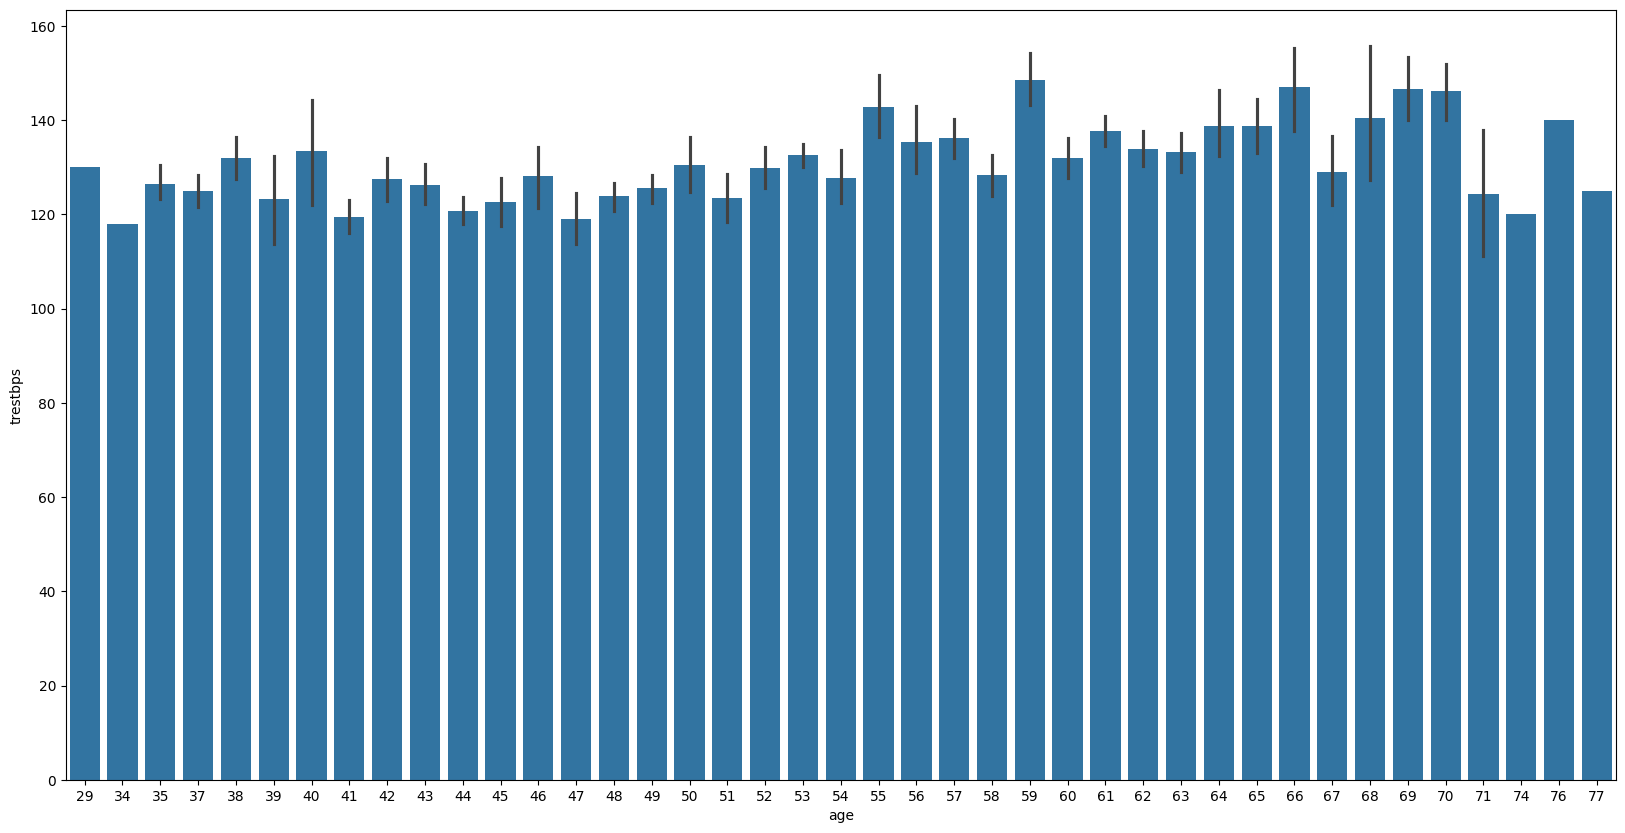

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=data["age"], y = data["trestbps"])
plt.show()

<Axes: xlabel='age', ylabel='trestbps'>

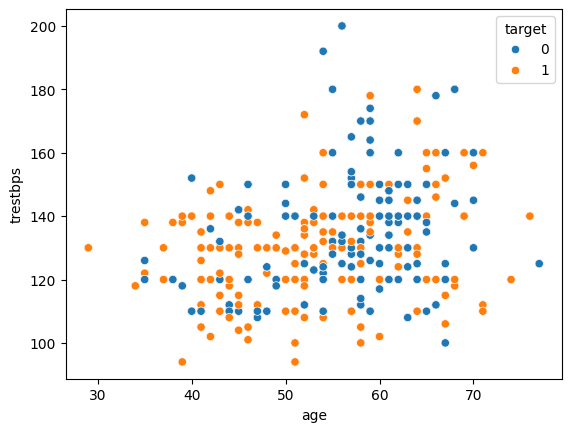

In [ ]:
sns.scatterplot(x = "age", y = "trestbps", data = data,hue = "target")

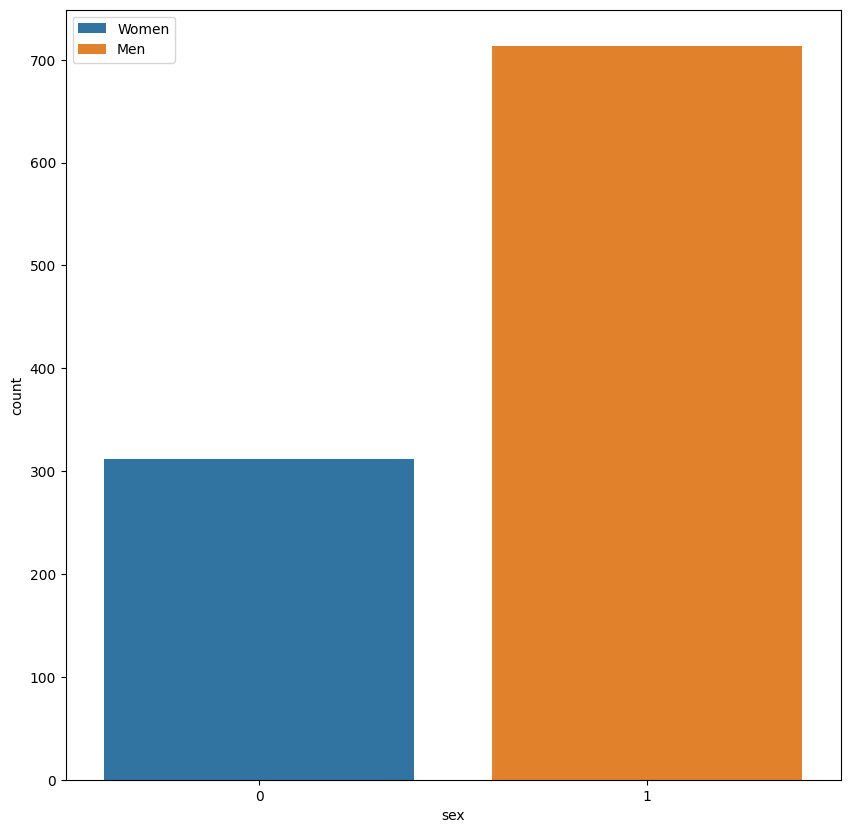

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(data = data, x ="sex",hue = "sex")
plt.legend(["Women", "Men"])
plt.show()

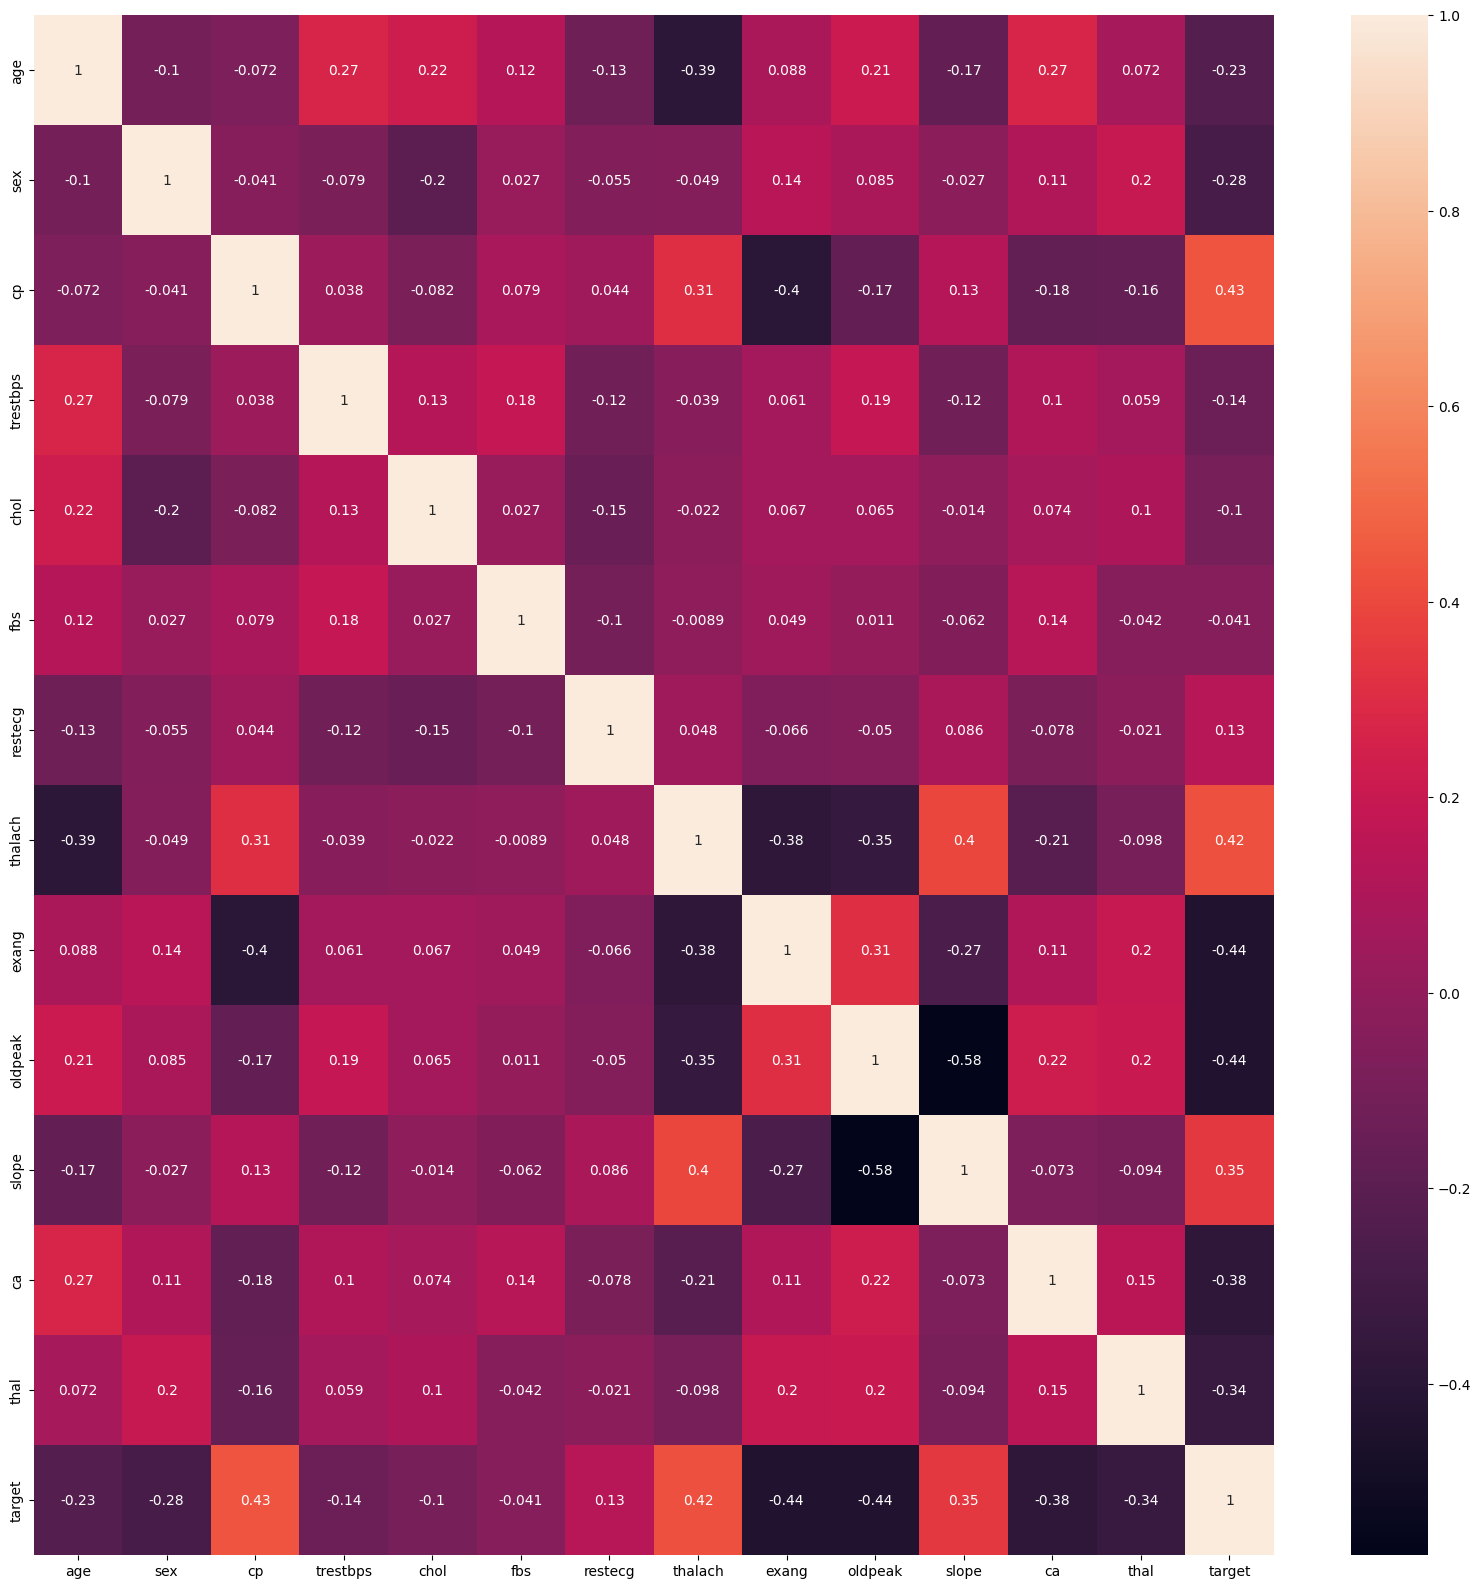

In [ ]:
data_co = data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(data_co , annot = True)
plt.show()

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
feature_names = X_train.columns

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
x_sam = np.random.uniform(low = -1, high = 1, size = (1,13))
# x_scale = scaler.transform(x)
# y_pred = dt.predict(x_scale)
# y_pred
xsam = pd.DataFrame(x_sam, columns = feature_names)
xsam
y_pred = dt.predict(xsam)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1])

In [ ]:
y_train_pred = dt.predict(x_train_scaled)
y_test_pred = dt.predict(X_test_scaled)
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test  = accuracy_score(y_test, y_test_pred)
print("Accuracy on training set:", accuracy_score_train)
print("Accuracy on test set:", accuracy_score_test)

Accuracy on training set: 1.0
Accuracy on test set: 0.9853658536585366


In [ ]:
svc = SVC()
svc.fit(x_train_scaled, y_train)

SVC()

In [ ]:
y_train_pred = svc.predict(x_train_scaled)
y_test_pred = svc.predict(X_test_scaled)
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test  = accuracy_score(y_test, y_test_pred)
print("Accuracy on training set:", accuracy_score_train)
print("Accuracy on test set:", accuracy_score_test)

Accuracy on training set: 0.9548780487804878
Accuracy on test set: 0.8878048780487805


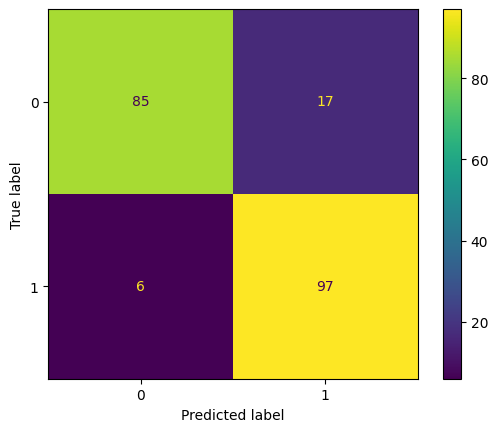

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
cls_report = classification_report(y_test, y_test_pred,target_names = ["Yes", "No"])
cls_report


'              precision    recall  f1-score   support\n\n         Yes       0.93      0.83      0.88       102\n          No       0.85      0.94      0.89       103\n\n    accuracy                           0.89       205\n   macro avg       0.89      0.89      0.89       205\nweighted avg       0.89      0.89      0.89       205\n'

In [ ]:
from sklearn.linear_model import Lasso, RidgeClassifier
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientDescent

In [ ]:
import numpy as np
a = np.array([1,2,3])

In [ ]:
a

array([1, 2, 3])

In [ ]:
a = np.array([(1,2,4,5), (5,6,7,8)])
a

array([[1, 2, 4, 5],
       [5, 6, 7, 8]])

In [ ]:
a = np.linspace(0,25,9)
a

array([ 0.   ,  3.125,  6.25 ,  9.375, 12.5  , 15.625, 18.75 , 21.875,
       25.   ])

In [ ]:
b = np.arange(9)
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
a.sum()

112.5

In [ ]:
c = a.view()
c

array([ 0.   ,  3.125,  6.25 ,  9.375, 12.5  , 15.625, 18.75 , 21.875,
       25.   ])

In [ ]:
d = np.concatenate((a,b), axis = 1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
d

array([ 0.   ,  3.125,  6.25 ,  9.375, 12.5  , 15.625, 18.75 , 21.875,
       25.   ,  0.   ,  1.   ,  2.   ,  3.   ,  4.   ,  5.   ,  6.   ,
        7.   ,  8.   ])

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, dataloader
import pandas as pd
import numpy as np
data = pd.read_csv("/content/Downloads")
data = data.drop(columns = "sex")
data

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
np_array = np.array(data)
np_array

array([[ 52.,   0., 125., ...,   2.,   3.,   0.],
       [ 53.,   0., 140., ...,   0.,   3.,   0.],
       [ 70.,   0., 145., ...,   0.,   3.,   0.],
       ...,
       [ 47.,   0., 110., ...,   1.,   2.,   0.],
       [ 50.,   0., 110., ...,   0.,   2.,   1.],
       [ 54.,   0., 120., ...,   1.,   3.,   0.]])

In [ ]:
tensor_data = torch.tensor(np_array)
tensor_data

tensor([[ 52.,   0., 125.,  ...,   2.,   3.,   0.],
        [ 53.,   0., 140.,  ...,   0.,   3.,   0.],
        [ 70.,   0., 145.,  ...,   0.,   3.,   0.],
        ...,
        [ 47.,   0., 110.,  ...,   1.,   2.,   0.],
        [ 50.,   0., 110.,  ...,   0.,   2.,   1.],
        [ 54.,   0., 120.,  ...,   1.,   3.,   0.]], dtype=torch.float64)

In [ ]:
tensor_data.shape

torch.Size([1025, 13])

In [ ]:
x_data = tensor_data[:,:-1]
x_data

tensor([[ 52.,   0., 125.,  ...,   2.,   2.,   3.],
        [ 53.,   0., 140.,  ...,   0.,   0.,   3.],
        [ 70.,   0., 145.,  ...,   0.,   0.,   3.],
        ...,
        [ 47.,   0., 110.,  ...,   1.,   1.,   2.],
        [ 50.,   0., 110.,  ...,   2.,   0.,   2.],
        [ 54.,   0., 120.,  ...,   1.,   1.,   3.]], dtype=torch.float64)

In [ ]:
x_data.shape

torch.Size([1025, 12])

In [ ]:
y_data = tensor_data[:,-1]
y_data

tensor([0., 0., 0.,  ..., 0., 1., 0.], dtype=torch.float64)

In [ ]:
y_data.shape

torch.Size([1025])

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
a = np.array([1,2,3,4,5])
b = np.array([1,2,3,4,5])
scalar = StandardScaler()
result = scalar.fit_transform(a)
result

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4. 5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, dataloader
import pandas as pd
import numpy as np
data = pd.read_csv("/content/Downloads")
# data = data.drop(columns = "sex")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
x

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape[1]

13

In [ ]:
x = torch.tensor([1,2,3,4])
torch.unsqueeze(x, 0).shape

torch.Size([1, 4])

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32).unsqueeze(1)

In [ ]:
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32).unsqueeze(1)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1],64)
        self.fc2 = nn.Linear(64,32)
        self.fc3 = nn.Linear(32,1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x
model = SimpleNN()

In [ ]:
model

SimpleNN(
  (fc1): Linear(in_features=13, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
n = 20
for epoch in range(n):
    model.train()
    for X, y in train_loader:
        y_pred = model(X)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}/{n}, Loss: {loss.item()}")

Epoch 1/20, Loss: 0.022317659109830856
Epoch 2/20, Loss: 0.03561147302389145
Epoch 3/20, Loss: 0.010659722611308098
Epoch 4/20, Loss: 0.01958547905087471
Epoch 5/20, Loss: 0.003774649929255247
Epoch 6/20, Loss: 0.005265808664262295
Epoch 7/20, Loss: 0.003110992256551981
Epoch 8/20, Loss: 0.006391558796167374
Epoch 9/20, Loss: 0.008131408132612705
Epoch 10/20, Loss: 0.008256617933511734
Epoch 11/20, Loss: 0.003096975153312087
Epoch 12/20, Loss: 0.008357493206858635
Epoch 13/20, Loss: 0.007074304856359959
Epoch 14/20, Loss: 0.007387169636785984
Epoch 15/20, Loss: 0.004513583146035671
Epoch 16/20, Loss: 0.0038446274120360613
Epoch 17/20, Loss: 0.0024730584118515253
Epoch 18/20, Loss: 0.003220639657229185
Epoch 19/20, Loss: 0.0029639643616974354
Epoch 20/20, Loss: 0.0026414478197693825


In [ ]:
output = 0.5
predicted = torch.tensor((output>0.5),dtype =torch.float32)
predicted

tensor(0.)

In [ ]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        # print(outputs)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Accuracy on test set: {accuracy * 100:.2f}%')

Accuracy on test set: 98.54%


In [ ]:
words = open("/content/names.txt", "r").read().splitlines()

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [ ]:
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        biagram = (ch1, ch2)
        b[biagram] = b.get(biagram, 0) +1


In [ ]:
b

{('<S>', 'e'): 1, ('e', 'm'): 1, ('m', 'm'): 1, ('m', 'a'): 1, ('a', '<E>'): 1}

In [ ]:
import torch
N = torch.zeros((27,27), dtype=torch.int32)

In [ ]:
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],


In [ ]:
chars = sorted(list(set("".join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [ ]:
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi["."] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [ ]:
stoi.items()

dict_items([('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6), ('g', 7), ('h', 8), ('i', 9), ('j', 10), ('k', 11), ('l', 12), ('m', 13), ('n', 14), ('o', 15), ('p', 16), ('q', 17), ('r', 18), ('s', 19), ('t', 20), ('u', 21), ('v', 22), ('w', 23), ('x', 24), ('y', 25), ('z', 26), ('.', 0)])

In [ ]:
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [ ]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] +=1

In [ ]:
N.shape

torch.Size([27, 27])

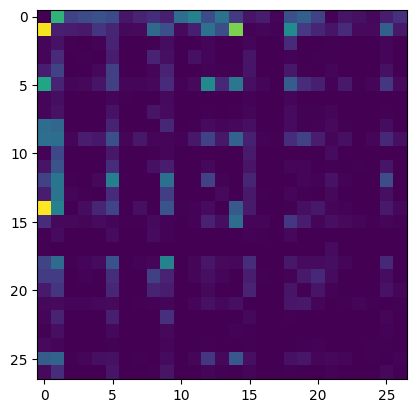

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(N)

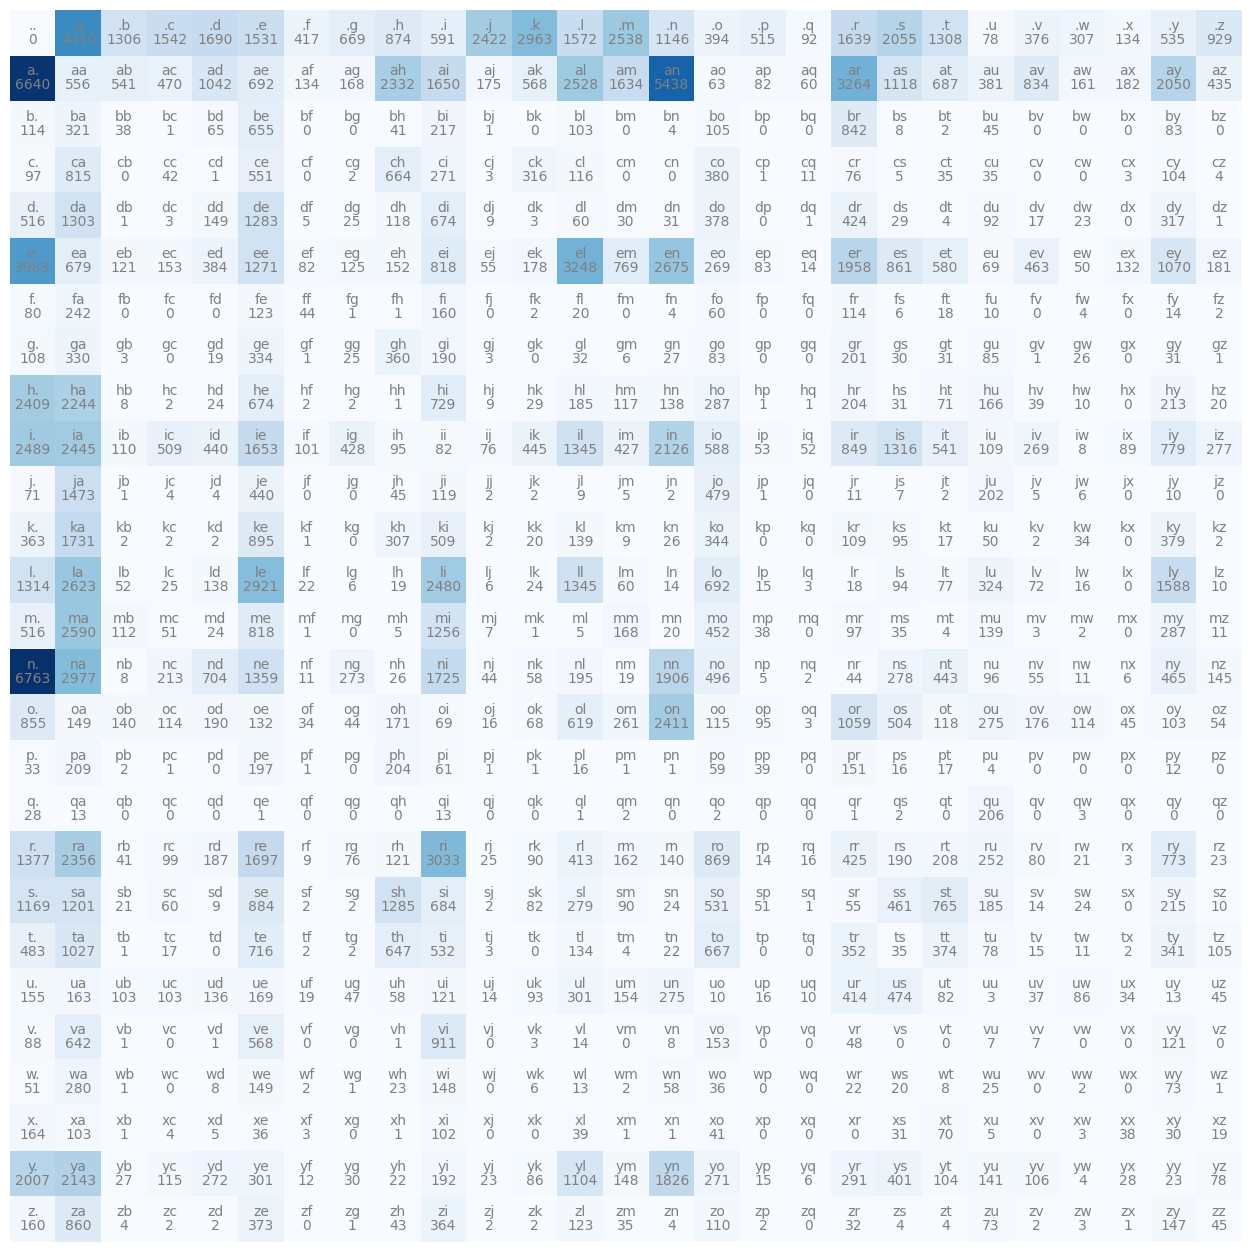

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [ ]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [ ]:
s = N[0].unsqueeze(1).sum(1)
s

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929])

In [ ]:
p = N.float()
p.shape
p /= p.sum(1, keepdims = True)
p.shape
p


tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [ ]:
generator = torch.Generator().manual_seed(2147483647)
p = p[0]
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=generator).item()
sampled_out = itos[ix]
sampled_out

'j'

In [ ]:
log_likelihood = 0
n = 0
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = p[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
print(f"Log-Likelihood: {log_likelihood}")
nll = -log_likelihood
print(f"nll: {nll/n}")

Log-Likelihood: -559891.75
nll: 2.454094171524048


In [ ]:
ix= 0
name =
for i in range(5):

    while True:
        P = p[ix]
        ix = torch.multinomial(P,num_samples=1, replacement=True, generator=generator).item()
        name.append(itos[ix])
        if ix == 0:
            break

print("".join(name))

dedainrwieta.
dedainrwieta.ssonielylarte.
dedainrwieta.ssonielylarte.faveumerifontume.
dedainrwieta.ssonielylarte.faveumerifontume.phynslenaruani.
dedainrwieta.ssonielylarte.faveumerifontume.phynslenaruani.core.
